## 이커머스 데이터를 통한 고객 세분화 및 마케팅 전략 제안

### 배경

> 최근 종합몰 이커머스 플랫폼의 연간 매출 성장세가 둔화되며 마케팅 부서에서는 **고객 유지율 향상 및 재구매율 증대**를 위한 데이터 기반 전략이 필요하다는 판단을 내렸다. 지난 1년의 이커머스 데이터를 통해 전체적인 서비스 이용 트렌드 분석과 RFM 고객 세분화 방법을 통해 올해 Google Merch Shop의 매출 향상을 위한 마케팅 전략을 제안하고자 한다. 


### 분석 목표

- 2019년 굿즈샵 거래 데이터 종합 분석
    - 매출 트렌드
    - 상품 및 상품카테고리 성과
    - 고객 유입 및 행동
    - 할인 및 프로모션 효과
- RFM 분석을 통한 고객 세분화 
    - 마케팅 타깃군을 선별하기 위한 고객 세분화


### 활용 데이터

https://dacon.io/en/competitions/official/236222/data 에서 해당 데이터의 스키마 조회 가능

- 온라인 거래와 관련된 정보: Onlinesales_info.csv 
- 고객과 관련된 정보: Customer_info.csv
- 할인과 관련된 정보: Discount_info.csv


### Preprocessing


In [3]:
import pandas as pd
import numpy as np

In [ ]:
# 고객 정보 로드
cust = pd.read_csv('./Customer_info.csv')
print(display(cust.head()))
print('\n')

# 할인 정보 로드
disc = pd.read_csv('./Discount_info.csv')
print(display(disc.head()))
print('\n')

# 마케팅 정보 로드
market = pd.read_csv('./Marketing_info.csv')
print(display(market.head()))
print('\n')

# 판매 정보 로드
sales = pd.read_csv('./Onlinesales_info.csv')
print(display(sales.head()))
print('\n')

# 세금 정보 로드
tax = pd.read_csv('./Tax_info.csv')
print(display(tax.head()))

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


None




In [5]:
# info

# cust
print(cust.info())
print(cust.describe())

# disc
print(disc.info())
print(disc.describe())

# market
print(market.info())
print(market.describe())

# tax
print(tax.info())
print(tax.describe())

# sales
print(sales.info())
print(sales.describe())

# tax
print(tax.info())
print(tax.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB
None
              가입기간
count  1468.000000
mean     25.912125
std      13.959667
min       2.000000
25%      14.000000
50%      26.000000
75%      38.000000
max      50.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None
              할인율
count  204.000000
mean    20.000000
std      8.185052
min 

In [ ]:
# 할인 정보에서 문자열 -> 숫자형 변환

disc = disc.replace('Jan', 1)
disc = disc.replace('Feb', 2)
disc = disc.replace('Mar', 3)
disc = disc.replace('Apr', 4)
disc = disc.replace('May', 5)
disc = disc.replace('Jun', 6)
disc = disc.replace('Jul', 7)
disc = disc.replace('Aug', 8)
disc = disc.replace('Sep', 9)
disc = disc.replace('Oct', 10)
disc = disc.replace('Nov', 11)
disc = disc.replace('Dec', 12)


/var/folders/yy/_061l71j3xb3mw44dldrpffc0000gn/T/ipykernel_3909/3332861501.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disc = disc.replace('Dec', 12)


In [ ]:
# 할인 코드 적용을 위한 거래월 칼럼 생성
sales['거래월'] = pd.to_datetime(sales['거래날짜']).dt.month
sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,거래월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12


In [ ]:
# 쿠폰 상태: Used -> 할인 적용, 그 외의 경우 -> 할인 미적용
sales = sales.rename(columns = {'거래월':'월'})
merged = sales.merge(disc, on = ['월','제품카테고리'], how='left')
merged.drop_duplicates(inplace=True)
merged['최종금액'] = np.where(merged['쿠폰상태'] == 'Used', 
                            merged['평균금액'] * (1 - merged['할인율'] / 100), merged['평균금액']
)
merged     # 할인가가 적용된 판매 정보


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10.0,138.339
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10.0,138.339
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1,OFF10,10.0,1.845
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1,SALE10,10.0,17.530
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1,AIO10,10.0,14.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12,ELEC30,30.0,121.300
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12,SALE30,30.0,34.244
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12,ELEC30,30.0,106.316
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,30.0,80.520


In [ ]:
# 할인가가 산출된 판매 정보
merged.to_csv('./sales_with_discount.csv')

In [12]:
# sales 데이터에서 고객수, 거래날짜(최소, 최대), 총거래액, 거래건수 추출
# 2019년 1월 ~ 12월까지의 데이터, 4.6백만달러, 

sales_info = pd.DataFrame({
    '고객수': [merged['고객ID'].nunique()],
    '거래날짜_최소': [merged['거래날짜'].min()],
    '거래날짜_최대': [merged['거래날짜'].max()],
    '총거래액': [(merged['수량'] * merged['최종금액']).sum()],
    '거래건수': [merged['거래날짜'].count()]
})

sales_info


,고객수,거래날짜_최소,거래날짜_최대,총거래액,거래건수
0,1468,2019-01-01,2019-12-31,4351608.242,52924


In [13]:
# 매출 데이터(sales)를 날짜별로 요약해서 하루 단위 매출 통계표
# 일별 평균 매출, 일별 주문수(거래_ID), 일별 건당 주문 금액, 고객 1명당 주문 금액, 주문 빈도, 주문 시 구매 품목 수, 1개 당 가격

summary = []

for i in merged['거래날짜'].unique(): #날짜 중복 방지

    tb = merged[merged['거래날짜'] == i] # 일자별 df 생성

    ord_amt = round((tb['수량'] * tb['최종금액']).sum(),2) # 총거래액
    ord_cnt = tb['거래ID'].nunique() # 총거래건수
    prd_cnt = tb['수량'].sum() #판매상품수량
    avg_ord_amt = round(ord_amt / ord_cnt,2) # 건당 평균거래액
    avg_prd_cnt = round(prd_cnt / ord_cnt,2) # 평균판매상품수량
    cust = tb['고객ID'].nunique() #구매고객수
    cust_val = round(ord_amt / cust,2) # 구매고객 평균거래액

    summary.append([i, ord_amt, ord_cnt, avg_ord_amt, avg_prd_cnt, cust, cust_val])

summary = pd.DataFrame(summary, 
          columns=['거래날짜', '총매출액', '총주문건수', '평균주문금액', 
                   '평균주문상품수량', '구매고객수', '구매고객평균거래액'])
summary

,거래날짜,총매출액,총주문건수,평균주문금액,평균주문상품수량,구매고객수,구매고객평균거래액
0,2019-01-01,7102.73,41,173.24,8.59,7,1014.68
1,2019-01-02,13028.74,71,183.50,3.61,10,1302.87
2,2019-01-03,23009.21,124,185.56,6.58,14,1643.52
3,2019-01-04,16076.39,89,180.63,6.79,6,2679.40
4,2019-01-05,16848.20,91,185.15,26.29,9,1872.02
...,...,...,...,...,...,...,...
360,2019-12-27,12456.51,68,183.18,4.09,7,1779.50
361,2019-12-28,9707.17,52,186.68,2.19,5,1941.43
362,2019-12-29,10673.04,65,164.20,1.86,3,3557.68
363,2019-12-30,7396.06,44,168.09,2.75,4,1849.02


In [14]:
summary.to_csv('./일별매출통계.csv')

In [20]:
# 일별 매출 통계와 고객 정보 머지하여 통합 데이터 생성
result = merged.merge(cust, on ='고객ID', how='outer')
result


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간
0,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,여,New York,31
1,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,여,New York,31
2,USER_0001,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,3,OFF30,30.0,2.990,남,New York,20
3,USER_0001,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,3,OFF30,30.0,6.993,남,New York,20
4,USER_0001,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,3,ELEC30,30.0,104.300,남,New York,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,Transaction_18636,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used,10,SALE10,10.0,7.911,여,New Jersey,36
52920,USER_1467,Transaction_18637,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used,10,SALE10,10.0,13.500,여,New Jersey,36
52921,USER_1467,Transaction_18637,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used,10,SALE10,10.0,15.291,여,New Jersey,36
52922,USER_1467,Transaction_18638,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked,10,SALE10,10.0,4.560,여,New Jersey,36


### RFM Analysis

 1. 이탈/준이탈 고객 탐색 및 리마인드 마케팅 타깃 정의
 2. 충성도 및 구매력 기반 핵심 고객 식별

In [21]:
result.columns

# 신규고객 레이블링
# recency
# frequency
# monetary

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '월', '쿠폰코드', '할인율', '최종금액', '성별', '고객지역', '가입기간'],
      dtype='object')

In [22]:
# 신규고객(가입한지 2개월 미만 고객) 설정 및 결제  금액 계산
df = result.copy()
df['신규고객'] = df['가입기간'].apply(lambda x: "Y" if x <= 2 else "N")
df['결제금액'] = df['최종금액'] * df['수량']
df 

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간,신규고객,결제금액
0,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,여,New York,31,N,13.993
1,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,여,New York,31,N,7.700
2,USER_0001,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,3,OFF30,30.0,2.990,남,New York,20,N,2.990
3,USER_0001,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,3,OFF30,30.0,6.993,남,New York,20,N,6.993
4,USER_0001,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,3,ELEC30,30.0,104.300,남,New York,20,N,104.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,Transaction_18636,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used,10,SALE10,10.0,7.911,여,New Jersey,36,N,7.911
52920,USER_1467,Transaction_18637,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used,10,SALE10,10.0,13.500,여,New Jersey,36,N,13.500
52921,USER_1467,Transaction_18637,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used,10,SALE10,10.0,15.291,여,New Jersey,36,N,30.582
52922,USER_1467,Transaction_18638,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked,10,SALE10,10.0,4.560,여,New Jersey,36,N,4.560


In [ ]:
# RFM 분석을 위한 R, F, M 변수 생성
# Recency: 최근구매일경과일, Frequency: 거래횟수, Monetary: 결제금액
df['거래날짜'] = pd.to_datetime(df['거래날짜'],format='%Y-%m-%d')

cust_purchase_info= df.groupby('고객ID').agg(최초거래일=('거래날짜','min'),
                                            마지막거래일=('거래날짜','max'),
                                            거래횟수=('거래ID','nunique'), # frequency
                                            결제금액=('결제금액','sum'))    # monetary

cust_purchase_info['평균거래주기(일)'] = (cust_purchase_info['마지막거래일'] - cust_purchase_info['최초거래일']).dt.days / (cust_purchase_info['거래횟수'] - 1)
cust_purchase_info['평균거래주기(월)'] = cust_purchase_info['평균거래주기(일)']/30

# 오늘날짜
today = pd.to_datetime('2020-01-01',format='%Y-%m-%d')

cust_purchase_info['최근구매일경과일'] = (today - cust_purchase_info['마지막거래일']).dt.days # recency
cust_purchase_info


,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일
고객ID,,,,,,,
USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108
USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60
USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74
USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18
USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108
...,...,...,...,...,...,...,...
USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271
USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88
USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195


In [26]:
cust_purchase_info.reset_index(inplace=True)

In [ ]:
# 고객별 거래 정보 요약
cust_purchase_info.to_csv('./고객거래정보요약.csv', index=False)

#### RFM 지표 시각화

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac: AppleGothic, Windows: Malgun Gothic)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

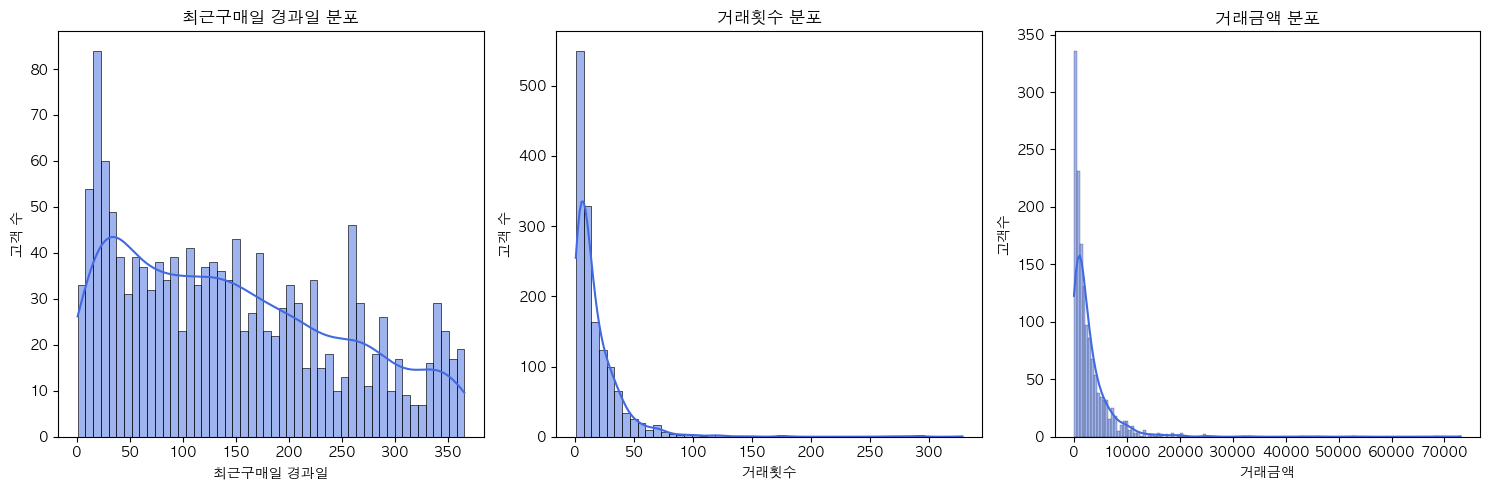

In [39]:
# Figure와 subplot (1행 3열) 설정

fig, axes = plt.subplots(1,3, figsize=(15,5))

# 최근구매일 경과일 분포
sns.histplot(cust_purchase_info['최근구매일경과일'], bins=50, kde=True, color='royalblue', ax=axes[0])
axes[0].set_title('최근구매일 경과일 분포')
axes[0].set_xlabel('최근구매일 경과일')
axes[0].set_ylabel('고객 수')

# 거래횟수(월) 분포
sns.histplot(cust_purchase_info['거래횟수'], bins=50, kde=True,color='royalblue', ax=axes[1])
axes[1].set_title('거래횟수 분포')
axes[1].set_xlabel('거래횟수')
axes[1].set_ylabel('고객 수')

# 거래금액 분포
sns.histplot(cust_purchase_info['결제금액'], kde=True, color='royalblue', ax=axes[2])
axes[2].set_title('거래금액 분포')
axes[2].set_xlabel('거래금액')
axes[2].set_ylabel('고객수')


# 여백 조정
plt.tight_layout()
plt.show()



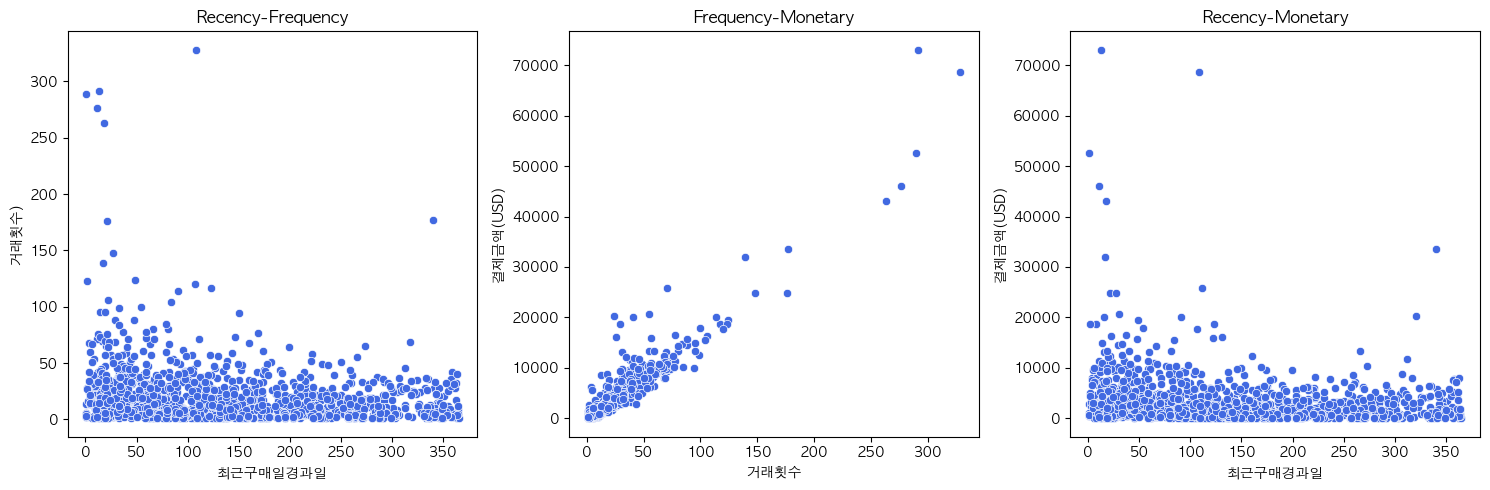

In [42]:
# 최근구매일(Recency), 평균거래주기(Frequency), 거래금액(Monetary)간 scatter plot

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x= cust_purchase_info['최근구매일경과일'], y= cust_purchase_info['거래횟수'], ax=axes[0], color='royalblue')
axes[0].set_title('Recency-Frequency')
axes[0].set_xlabel('최근구매일경과일')
axes[0].set_ylabel('거래횟수)')

sns.scatterplot(x= cust_purchase_info['거래횟수'], y= cust_purchase_info['결제금액'], ax=axes[1], color='royalblue') # 거래금액에 log를 적용시켜서 분포를 안정화
axes[1].set_title('Frequency-Monetary')
axes[1].set_xlabel('거래횟수')
axes[1].set_ylabel('결제금액(USD)')

sns.scatterplot(x= cust_purchase_info['최근구매일경과일'], y= cust_purchase_info['결제금액'], ax=axes[2], color='royalblue') # 거래금액에 log를 적용시켜서 분포를 안정화
axes[2].set_title('Recency-Monetary')
axes[2].set_xlabel('최근구매경과일')
axes[2].set_ylabel('결제금액(USD)')

# 여백조정
plt.tight_layout()
plt.show()

#### RFM score 계산

- 변수간 스케일 차이가 너무 많이 나므로 Min-Max Scaling을 통해 R, F, M 지표 정규화 진행

In [ ]:
# scaling data

# ▶ Min max scale = 최대값을 1, 최소값을 0으로 표준화하는 기법
from sklearn.preprocessing import minmax_scale

cust_purchase_info['recency'] = minmax_scale(cust_purchase_info['최근구매일경과일'], axis=0, copy=True)
cust_purchase_info['recency'] = 1- cust_purchase_info['recency'] # 경과일이 보통 높으면 안좋은 것, 1에서 빼줘서 어느정도 방향성 통일

cust_purchase_info['frequency'] = minmax_scale(cust_purchase_info['거래횟수'], axis=0, copy=True)
cust_purchase_info['monetary'] = minmax_scale(cust_purchase_info['결제금액'], axis=0, copy=True)

cust_purchase_info['score'] = cust_purchase_info['recency'] + cust_purchase_info['frequency'] + cust_purchase_info['monetary']

cust_purchase_info

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,0.706329
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,1.108324
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,0.838796
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,1.000399
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,0.759644
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271,0.258242,0.006116,0.007286,0.271644
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88,0.760989,0.055046,0.029182,0.845217
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195,0.467033,0.003058,0.001329,0.471420
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70,0.810440,0.000000,0.004067,0.814506


In [45]:
# ▶ 100점을 곱해서 100점 만점으로 scaling

cust_purchase_info['score'] = minmax_scale(cust_purchase_info['score'], axis=0, copy=True) *100
cust_purchase_info['score'] = round(cust_purchase_info['score'],0)

In [ ]:
# 정규화된 RFM 점수가 구해진 고객거래정보 
cust_purchase_info

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,25.0
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,39.0
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,29.0
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,35.0
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271,0.258242,0.006116,0.007286,10.0
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88,0.760989,0.055046,0.029182,30.0
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195,0.467033,0.003058,0.001329,17.0
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70,0.810440,0.000000,0.004067,29.0


In [50]:
cust_purchase_info.to_csv('./고객별RFM점수.csv')

In [47]:
cust_rfm = cust_purchase_info.copy()

# RFM 기반 고객 세그먼트
cust_rfm.head()

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,25.0
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,39.0
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,29.0
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,35.0
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,27.0


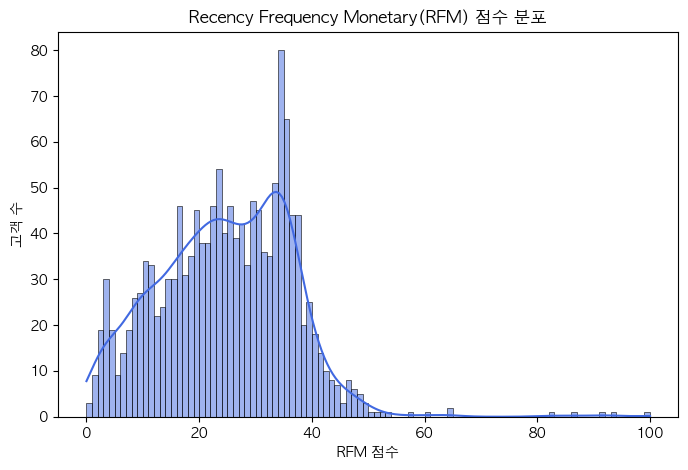

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(cust_rfm['score'], bins=100, kde=True, color='royalblue')
plt.title('Recency Frequency Monetary(RFM) 점수 분포')
plt.xlabel('RFM 점수')
plt.ylabel('고객 수')
plt.show()

In [303]:
cust_rfm.drop(columns=['고객등급'], inplace=True)

In [ ]:
# 5분위 수 점수 산출
quantiles = cust_rfm['score'].quantile([0.2, 0.4, 0.6, 0.8])
quantiles

0.2    14.0
0.4    22.0
0.6    28.2
0.8    34.0
Name: score, dtype: float64

In [ ]:
# 5등급으로 고객 세분화 
# 최우수, 우수, 일반, 하위, 최하위
cust_rfm['고객등급'] = cust_rfm['score'].apply(lambda x : '1_최우수' if x>=34 else
                                  ('2_우수' if x>=28.2 else
                                   ('3_일반' if x>=22.0 else
                                    ('4_하위' if x>=14.0 else 
                                      '5_최하위'))))
cust_rfm.sort_values(by='고객등급', ascending=True, inplace=True)
cust_rfm

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score,고객등급
135,USER_0135,2019-04-19,2019-11-08,31,7326.174,6.766667,0.225556,54,0.854396,0.091743,0.100272,37.0,1_최우수
1052,USER_1052,2019-06-14,2019-12-08,28,2847.124,6.555556,0.218519,24,0.936813,0.082569,0.038961,37.0,1_최우수
411,USER_0411,2019-12-16,2019-12-17,45,6975.185,0.022727,0.000758,15,0.961538,0.134557,0.095468,42.0,1_최우수
410,USER_0410,2019-08-24,2019-11-22,38,7086.414,2.432432,0.081081,40,0.892857,0.113150,0.096990,39.0,1_최우수
1056,USER_1056,2019-11-01,2019-11-01,47,9800.002,0.000000,0.000000,61,0.835165,0.140673,0.134135,39.0,1_최우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,USER_1059,2019-02-21,2019-02-22,28,4252.832,0.037037,0.001235,313,0.142857,0.082569,0.058203,10.0,5_최하위
475,USER_0475,2019-01-30,2019-01-30,1,15.876,NaN,NaN,336,0.079670,0.000000,0.000205,3.0,5_최하위
369,USER_0369,2019-02-10,2019-02-11,35,6035.832,0.029412,0.000980,324,0.112637,0.103976,0.082609,10.0,5_최하위
832,USER_0832,2019-02-16,2019-02-17,22,2046.550,0.047619,0.001587,318,0.129121,0.064220,0.028002,8.0,5_최하위


In [118]:
cust_rfm['고객등급'].nunique()

5

In [119]:
# 그런데 quantile로 5등급을 공평하게 나눴는데 왜 고객등급에 속한 고객의 수가 다르지?
cust_rfm['고객등급'].value_counts()

고객등급
1_최우수    373
3_일반     300
4_하위     293
5_최하위    288
2_우수     214
Name: count, dtype: int64

In [ ]:
# 고객의 등급까지 결합된 고객 거래 정보
cust_rfm.head()
cust_rfm.to_csv('./고객세분화결과.csv', index=False)

In [123]:
cust_rfm.head()

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score,고객등급
135,USER_0135,2019-04-19,2019-11-08,31,7326.174,6.766667,0.225556,54,0.854396,0.091743,0.100272,37.0,1_최우수
1052,USER_1052,2019-06-14,2019-12-08,28,2847.124,6.555556,0.218519,24,0.936813,0.082569,0.038961,37.0,1_최우수
411,USER_0411,2019-12-16,2019-12-17,45,6975.185,0.022727,0.000758,15,0.961538,0.134557,0.095468,42.0,1_최우수
410,USER_0410,2019-08-24,2019-11-22,38,7086.414,2.432432,0.081081,40,0.892857,0.113150,0.096990,39.0,1_최우수
1056,USER_1056,2019-11-01,2019-11-01,47,9800.002,0.000000,0.000000,61,0.835165,0.140673,0.134135,39.0,1_최우수


In [ ]:
# 고객 등급별 구매일 경과일, 구매 빈도, 구매 가격 요약
cust_rfm_summary= cust_rfm.groupby('고객등급').agg(
    평균_최근구매일경과일=('최근구매일경과일','mean'),
    평균_거래빈도=('거래횟수','mean'),
    평균_결제금액=('결제금액','mean'),
    총_결제금액=('결제금액','sum')
)
cust_rfm_summary['평균_최근구매일경과일'] = cust_rfm_summary['평균_최근구매일경과일'].round(2)
cust_rfm_summary['평균_거래빈도'] = cust_rfm_summary['평균_거래빈도'].round(2)
cust_rfm_summary['평균_결제금액'] = cust_rfm_summary['평균_결제금액'].round(2)
cust_rfm_summary['총_결제금액'] = cust_rfm_summary['총_결제금액'].round(2)
cust_rfm_summary.reset_index(inplace=True)

# 등급별 총 매출액 전체 합
total_sales = cust_rfm_summary['총_결제금액'].sum()

# 비중 계산
cust_rfm_summary['결제금액비중(%)'] = round(cust_rfm_summary['총_결제금액'] / total_sales,2) * 100 
cust_rfm_summary


,고객등급,평균_최근구매일경과일,평균_거래빈도,평균_결제금액,총_결제금액,결제금액비중(%)
0,1_최우수,33.69,35.26,6227.33,2322793.58,53.0
1,2_우수,74.71,17.55,2704.11,578679.91,13.0
2,3_일반,129.92,12.84,1850.55,555165.34,13.0
3,4_하위,200.74,10.97,1609.29,471521.04,11.0
4,5_최하위,301.88,9.23,1470.31,423448.37,10.0


In [154]:
cust_rfm_summary = cust_rfm_summary.rename(columns={'평균_최근구매일경과일':'평균 최근구매일경과일',
                                                    '평균_거래빈도': '평균 거래빈도',
                                                    '평균_결제금액': '평균 결제액',
                                                    '총_결제금액': '총 결제액'})
cust_rfm_summary.iloc[0,0] = '최우수'
cust_rfm_summary.iloc[1,0] = '우수'
cust_rfm_summary.iloc[2,0] = '일반'
cust_rfm_summary.iloc[3,0] = '하위'
cust_rfm_summary.iloc[4,0] = '최하위'
cust_rfm_summary


,고객등급,평균 최근구매일경과일,평균 거래빈도,평균 결제액,총 결제액,결제금액비중(%)
0,최우수,33.69,35.26,6227.33,2322793.58,53.0
1,우수,74.71,17.55,2704.11,578679.91,13.0
2,일반,129.92,12.84,1850.55,555165.34,13.0
3,하위,200.74,10.97,1609.29,471521.04,11.0
4,최하위,301.88,9.23,1470.31,423448.37,10.0


In [ ]:
# 고객 ID - 고객 등급 테이블 생성

grade_info= cust_rfm[['고객ID','고객등급']]
grade_info.reset_index(inplace=True)
grade_info = grade_info[['고객ID','고객등급']]
grade_info

,고객ID,고객등급
0,USER_0135,1_최우수
1,USER_1052,1_최우수
2,USER_0411,1_최우수
3,USER_0410,1_최우수
4,USER_1056,1_최우수
...,...,...
1463,USER_1059,5_최하위
1464,USER_0475,5_최하위
1465,USER_0369,5_최하위
1466,USER_0832,5_최하위


In [144]:
df2 = result.copy()
df2 = df2.merge(grade_info, on='고객ID', how='left')
print(df2)


            고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_0000  Transaction_16900  2019-09-15  Product_0048   Apparel   1   
1      USER_0000  Transaction_16900  2019-09-15  Product_0946    Office   2   
2      USER_0001   Transaction_5262  2019-03-24  Product_0945    Office   1   
3      USER_0001   Transaction_5262  2019-03-24  Product_0965    Office   1   
4      USER_0001   Transaction_5263  2019-03-24  Product_0981  Nest-USA   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_1467  Transaction_18636  2019-10-10  Product_0922   Apparel   1   
52920  USER_1467  Transaction_18637  2019-10-10  Product_0095   Apparel   1   
52921  USER_1467  Transaction_18637  2019-10-10  Product_0390   Apparel   2   
52922  USER_1467  Transaction_18638  2019-10-10  Product_0228   Apparel   1   
52923  USER_1467  Transaction_18638  2019-10-10  Product_0616   Apparel   1   

         평균금액    배송료     쿠폰상태   월    쿠폰코드   할인율    

In [171]:
df2['신규고객'] = df2['가입기간'].apply(lambda x: 'Y' if x<=2 else 'N')
df2.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간,고객등급,신규고객
0,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,여,New York,31,3_일반,N
1,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,여,New York,31,3_일반,N
2,USER_0001,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,3,OFF30,30.0,2.990,남,New York,20,1_최우수,N
3,USER_0001,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,3,OFF30,30.0,6.993,남,New York,20,1_최우수,N
4,USER_0001,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,3,ELEC30,30.0,104.300,남,New York,20,1_최우수,N


In [ ]:
# 쿠폰 민감 고객군 선별을 위한 작업1: 고객별 구매수 카운트
total_count = df.groupby('고객ID')['쿠폰상태'].count().reset_index()
total_count= total_count.rename(columns={'쿠폰상태':'총구매수'})
total_count

,고객ID,총구매수
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [183]:
# 쿠폰 사용률 확인
test = df2[(df2['고객등급'] =='5_최하위') & (df2['쿠폰상태'] =='Used')]
test


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간,고객등급,신규고객
694,USER_0024,Transaction_6418,2019-04-13,Product_0981,Nest-USA,1,149.00,6.00,Used,4,ELEC10,10.0,134.100,여,New Jersey,43,5_최하위,N
695,USER_0024,Transaction_6418,2019-04-13,Product_0984,Nest-USA,3,79.00,6.00,Used,4,ELEC10,10.0,71.100,여,New Jersey,43,5_최하위,N
697,USER_0024,Transaction_6420,2019-04-13,Product_0257,Apparel,1,12.31,75.00,Used,4,SALE10,10.0,11.079,여,New Jersey,43,5_최하위,N
699,USER_0024,Transaction_6420,2019-04-13,Product_0524,Apparel,1,41.59,75.00,Used,4,SALE10,10.0,37.431,여,New Jersey,43,5_최하위,N
701,USER_0024,Transaction_6420,2019-04-13,Product_0922,Apparel,1,8.79,75.00,Used,4,SALE10,10.0,7.911,여,New Jersey,43,5_최하위,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52590,USER_1454,Transaction_6902,2019-04-19,Product_0894,Drinkware,7,2.39,12.48,Used,4,EXTRA10,10.0,2.151,여,New Jersey,28,5_최하위,N
52591,USER_1454,Transaction_6902,2019-04-19,Product_0942,Office,30,2.00,12.48,Used,4,OFF10,10.0,1.800,여,New Jersey,28,5_최하위,N
52770,USER_1463,Transaction_5984,2019-04-05,Product_0247,Apparel,4,11.19,59.16,Used,4,SALE10,10.0,10.071,여,California,5,5_최하위,N
52771,USER_1463,Transaction_5984,2019-04-05,Product_0248,Apparel,4,11.19,59.16,Used,4,SALE10,10.0,10.071,여,California,5,5_최하위,N


In [ ]:
# 쿠폰 민감 고객군 선별을 위한 작업1: 고객별  쿠폰사용 횟수 카툰트
used = test.groupby('고객ID')['쿠폰상태'].count().reset_index()
used = used.rename(columns={'쿠폰상태':'쿠폰사용'})
used

,고객ID,쿠폰사용
0,USER_0024,6
1,USER_0029,7
2,USER_0082,1
3,USER_0097,1
4,USER_0107,8
...,...,...
249,USER_1434,7
250,USER_1440,18
251,USER_1448,1
252,USER_1454,3


In [ ]:
# 쿠폰 민감 고객군 선별
used_count = total_count.merge(used, on='고객ID', how='left')
used_count['비율'] = (used_count['쿠폰사용'] / used_count['총구매수'] ) * 100
used_count = used_count.sort_values(by='비율', ascending=False)
used_count

,고객ID,총구매수,쿠폰사용,비율
677,USER_0677,1,1.0,100.0
1448,USER_1448,1,1.0,100.0
256,USER_0256,1,1.0,100.0
582,USER_0582,1,1.0,100.0
1253,USER_1253,1,1.0,100.0
...,...,...,...,...
1462,USER_1462,4,NaN,NaN
1464,USER_1464,40,NaN,NaN
1465,USER_1465,8,NaN,NaN
1466,USER_1466,1,NaN,NaN


In [195]:
used_count.to_csv('./쿠폰반응.csv')

In [173]:
df2[df2['신규고객']=='Y']['고객등급'].value_counts()

고객등급
3_일반     177
1_최우수    167
2_우수     154
4_하위      92
5_최하위     59
Name: count, dtype: int64

In [ ]:
# 신규고객 여부까지 더해진 고객거래정보(거래정보, RFM 점수, 고객등급, 신규고객여부)
df2.to_csv('./Rfm_신규고객_251119.csv')